In [1]:
library(ape)
library(jsonlite)
suppressPackageStartupMessages(library(ggtree))

dataDir <- "Data"
genomeTreeDir <- "Genome_tree"
genomeTreeEXDir <- "Genome_tree_EX"
snpCompareDir <- "SNPs_comparison"

Warning message:
"package 'jsonlite' was built under R version 3.6.2"


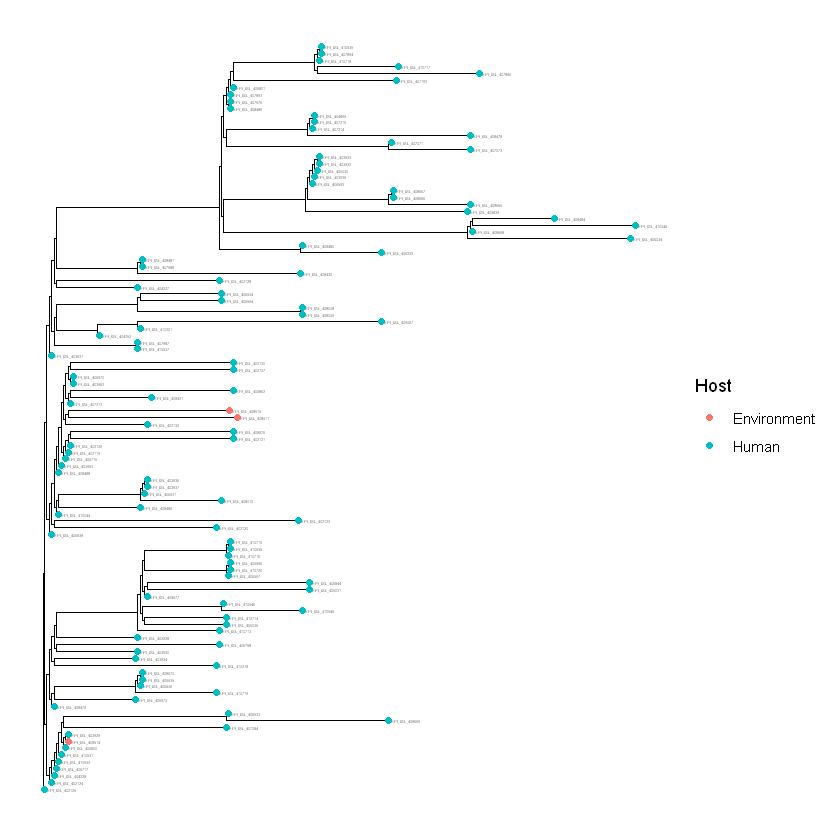

In [2]:
tree <- read.tree(file.path(genomeTreeDir, "RAxML_bestTree.GTRGAMMA"))
info <- read.csv(file.path(dataDir, "info.csv"))
p <- ggtree(tree)
p <- p %<+% info + 
    geom_tiplab(size = 0.75) + 
    geom_tippoint(aes(color=Host))
p

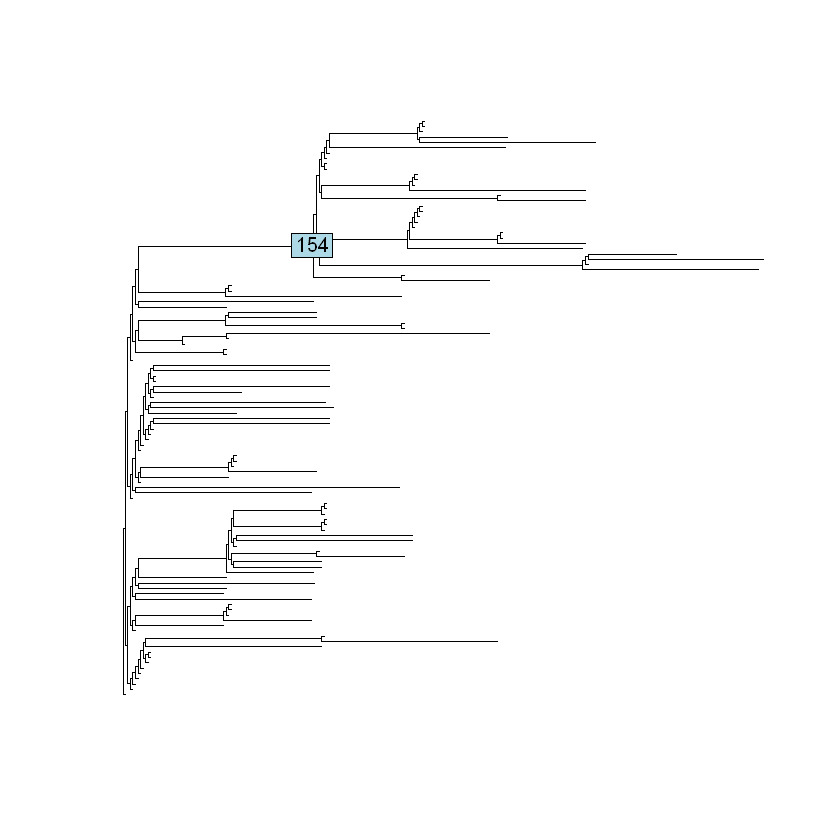

In [3]:
plot(ladderize(tree, FALSE), show.tip.label = FALSE)
nodelabels(node=154)

In [4]:
genotypes <- list()

genotypes[["G1"]] <- extract.clade(tree, 154)$tip.label

In [5]:
# plot(ladderize(tree, FALSE), use.edge.length = TRUE, show.tip.label = FALSE)
# nodelabels(node=198)

In [6]:
# genotypes[["gp2"]] <- setdiff(
#     extract.clade(tree, 198)$tip.label,
#     genotypes[["gp1"]]
# )

In [7]:
# plot(ladderize(tree, FALSE), use.edge.length = FALSE, show.tip.label = FALSE)
# nodelabels(node = 187)

In [8]:
# genotypes[["gp3"]] <- extract.clade(tree, 187)$tip.label

In [9]:
genotypes[["G2"]] <- setdiff(tree$tip.label, unlist(genotypes))

In [10]:
write_json(x = genotypes, path = file.path(dataDir, "genotypes.json"))

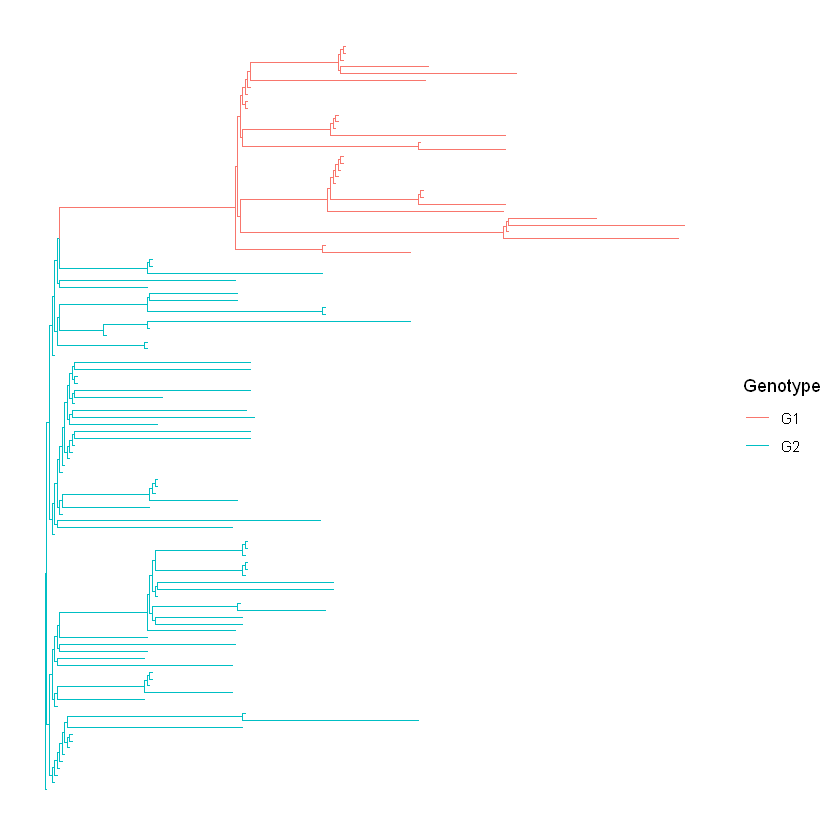

In [11]:
ggtree(groupOTU(tree, genotypes, "Genotype")) + aes(color=Genotype)

In [32]:
# tree <- read.tree(file.path(genomeTreeEXDir, "CoV_all_upper.fasta.treefile"))
tree <- read.tree(file.path(genomeTreeEXDir, "RAxML_bestTree.GTRGAMMA"))

In [33]:
info[["Category"]] <- as.character(info[["Host"]])

for (gp in names(genotypes)) {
    tipNames <- genotypes[[gp]]
    for (t in tipNames) {
        host <- info[which(info[["Accession.ID"]] == t), "Host"]
        if (host == "Human") {
            info[which(info[["Accession.ID"]] == t), "Category"] <- gp
        } else {
            info[which(info[["Accession.ID"]] == t), "Category"] <- host
        }
    }
    
}

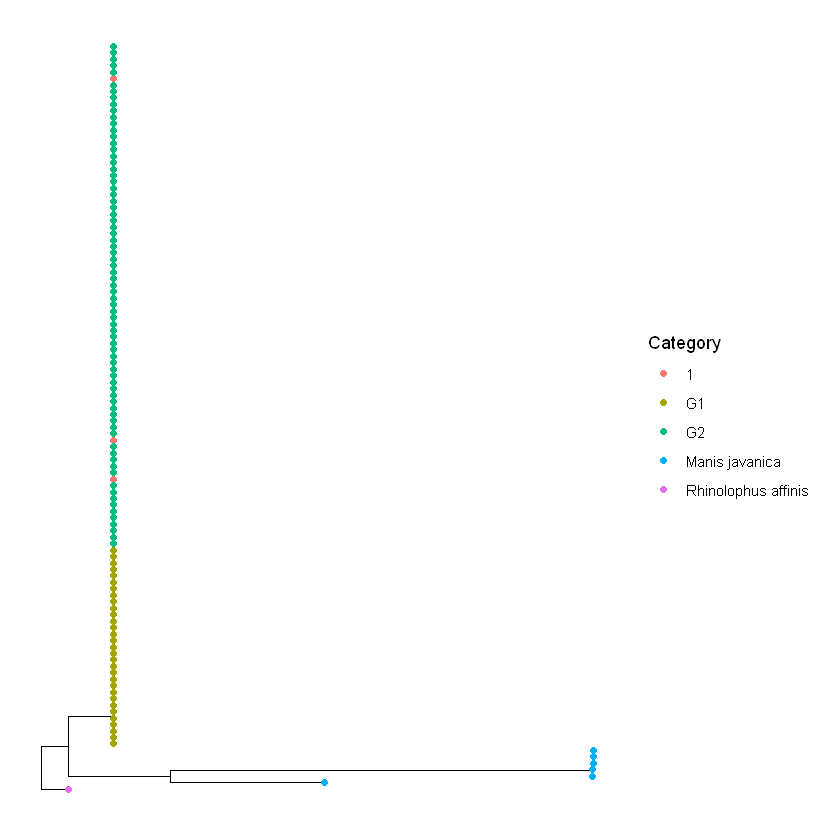

In [34]:
p <- ggtree(tree)
p <- p %<+% info + 
    geom_tippoint(aes(color=Category))
p

Average angle change [1] 0.13682349284446

Average angle change [2] 0.0822341578812396

Average angle change [3] 0.0233858523524805



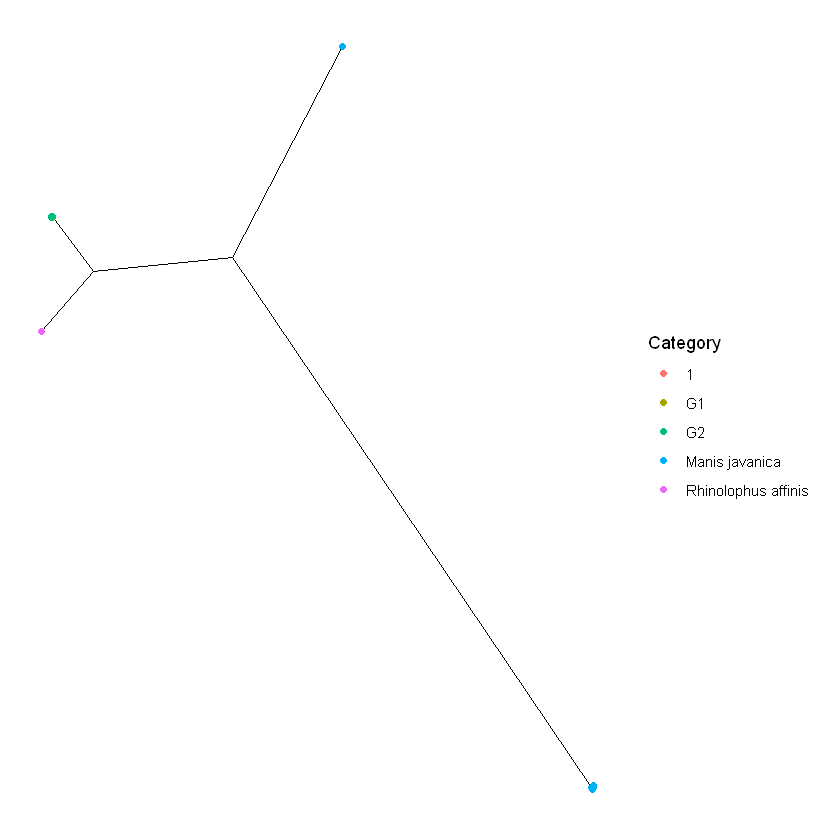

In [35]:
p <- ggtree(tree, layout="daylight")
p <- p %<+% info + 
    geom_tippoint(aes(color=Category))
p